Columns in order: ['stage_m', 'tavg', 'prcp', 'wspd', 'pres', 'rhum']

New sequence shapes:
X_train shape: (8458, 7, 6)
y_train shape: (8458, 7)
Number of features being used: 6


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 7, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_24 (LSTM)      │ (None, 7, 128)    │     69,120 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_25 (LSTM)      │ [(None, 128),     │    131,584 │ lstm_24[0][0]     │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_6     │ (None, 7, 128)    │          0 │ lstm_25[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_26 (LSTM)      │ (None, 7, 128)    │    131,584 │ repeat_vector_6[… │
│                     │                   │            │ lstm_25[0][1],    │
│                     │                   │            │ lstm_25[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_27 (LSTM)      │ (None, 7, 128)    │    131,584 │ lstm_26[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_6  │ (None, 7, 1)      │        129 │ lstm_27[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 464,001 (1.77 MB)

 Trainable params: 464,001 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.7016 - val_loss: 0.6211
Epoch 2/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.5424 - val_loss: 0.5795
Epoch 3/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.5332 - val_loss: 0.5432
Epoch 4/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.5202 - val_loss: 0.5405
Epoch 5/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.4973 - val_loss: 0.5327
Epoch 6/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.5133 - val_loss: 0.5369
Epoch 7/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.5070 - val_loss: 0.5392
Epoch 8/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.5005 - val_loss: 0.5266
Epoch 9/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.4899 - val_loss: 0.5222
Epoch 10/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4787 - val_loss: 0.5320
Epoch 11/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4819 - val_loss: 0.5305
Epoch 12/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step

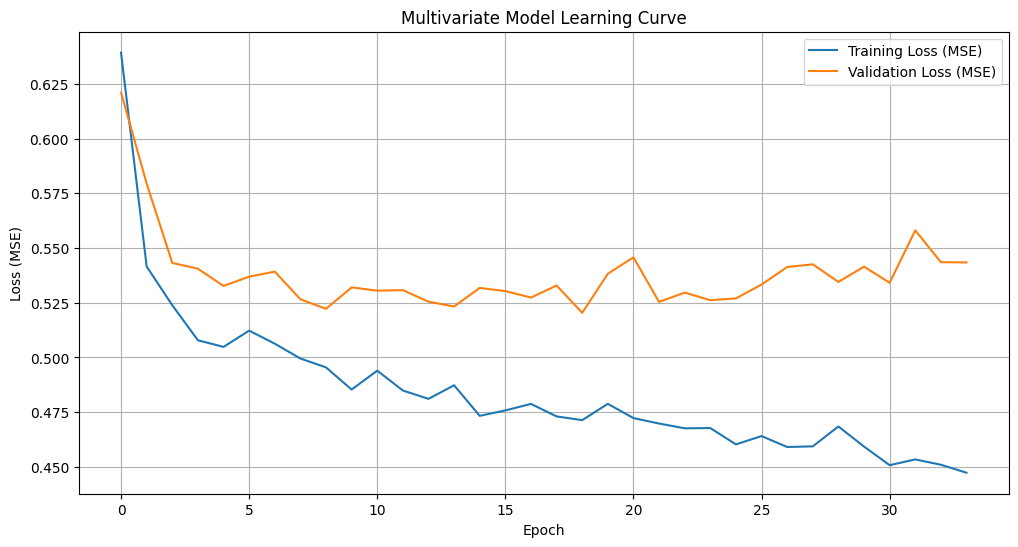

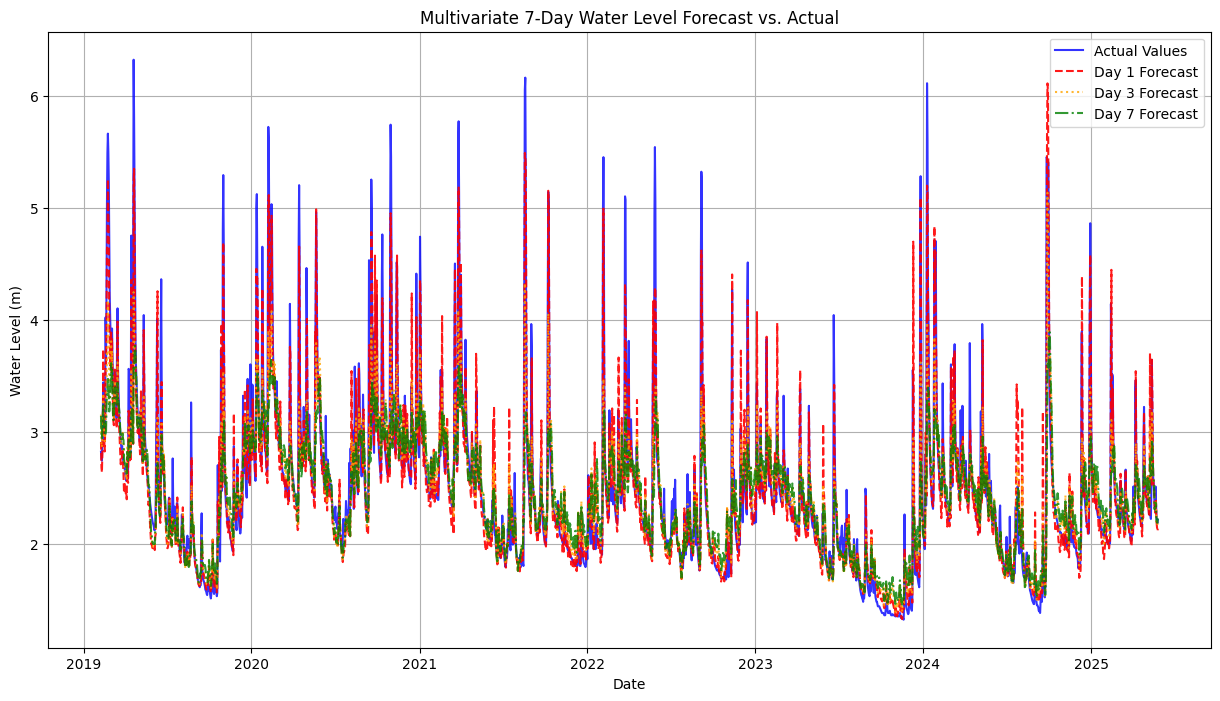

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Load and Prepare MULTIVARIATE Data ## MULTIVARIATE CHANGE ##
# Load the combined dataset with weather features
df_multi = pd.read_csv('combined_dataset.csv', index_col='datetime', parse_dates=True)


# Ensure 'stage_m' is the first column, as our sequence function will use it as the target
df_multi = df_multi[['stage_m'] + [col for col in df_multi.columns if col != 'stage_m']]
print("Columns in order:", df_multi.columns.tolist())

# 2. Split Data with a Gap (Same logic, new dataframe)
split_date_train_end = '2019-01-01'
split_date_val_start = '2019-02-01'
train_data = df_multi.loc[df_multi.index < split_date_train_end]
val_data = df_multi.loc[df_multi.index >= split_date_val_start]

# 3. Scale Data ## MULTIVARIATE CHANGE ##
# The scaler will now be fit on all features
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.transform(val_data)

# 4. Create Sequences ## MULTIVARIATE CHANGE ##
# The function now takes all columns for X, but still only the first column for y
N_PAST = 7    # Use 7 days of history
N_FUTURE = 7  # Predict 7 days into the future

def create_sequences(data, n_past, n_future):
    X, y = [], []
    target_col_index = 0 # 'stage_m' is at index 0
    for i in range(n_past, len(data) - n_future + 1):
        # Input X: takes n_past days of ALL features
        X.append(data[i - n_past:i, :])
        # Output y: takes n_future days of ONLY the target feature
        y.append(data[i:i + n_future, target_col_index])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(scaled_train_data, N_PAST, N_FUTURE)
X_val, y_val = create_sequences(scaled_val_data, N_PAST, N_FUTURE)
# Note: No .reshape() is needed for X, as it's already 3D

print(f"\nNew sequence shapes:")
print(f"X_train shape: {X_train.shape}") # Should be (samples, 7, num_features)
print(f"y_train shape: {y_train.shape}")   # Should be (samples, 7)

# 5. Build Stacked LSTM Encoder-Decoder (Same architecture, just n_features will be > 1)
n_features = X_train.shape[2]
print(f"Number of features being used: {n_features}")
UNITS = 128
DROPOUT_RATE = 0.15

inputs = Input(shape=(N_PAST, n_features))
encoder_l1 = LSTM(UNITS, return_sequences=True, dropout=DROPOUT_RATE)(inputs)
encoder_l2, state_h, state_c = LSTM(UNITS, return_sequences=False, dropout=DROPOUT_RATE, return_state=True)(encoder_l1)
encoder_states = [state_h, state_c]
decoder_inputs = RepeatVector(N_FUTURE)(encoder_l2)
decoder_l1 = LSTM(UNITS, return_sequences=True, dropout=DROPOUT_RATE)(decoder_inputs, initial_state=encoder_states)
decoder_l2 = LSTM(UNITS, return_sequences=True, dropout=DROPOUT_RATE)(decoder_l1)
output = TimeDistributed(Dense(1))(decoder_l2)
model = Model(inputs=inputs, outputs=output)

# 6. Compile Model (Same as our best univariate model)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# 7. Train the Model ## MULTIVARIATE CHANGE ##
# Using a new filename for the saved model
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_multivariate_model.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# 8. Evaluation and Visualization ## MULTIVARIATE CHANGE ##
# The logic for inverse scaling the predictions is now more complex

best_model = tf.keras.models.load_model('best_multivariate_model.keras')
predictions_scaled = best_model.predict(X_val).squeeze()

# --- Special handling for inverse scaling ---
# Create a dummy array shaped like the original data the scaler was fit on
# We will overwrite the first column (our target) with our predictions
dummy_preds = np.zeros((len(predictions_scaled.flatten()), n_features))
dummy_preds[:, 0] = predictions_scaled.flatten()
# Inverse transform the entire dummy array
rescaled_preds = scaler.inverse_transform(dummy_preds)
# Extract just the first column (our rescaled predictions) and reshape
predictions_original = rescaled_preds[:, 0].reshape(y_val.shape)

# Do the same for the true values
dummy_true = np.zeros((len(y_val.flatten()), n_features))
dummy_true[:, 0] = y_val.flatten()
rescaled_true = scaler.inverse_transform(dummy_true)
y_true_original = rescaled_true[:, 0].reshape(y_val.shape)
# --- End of special handling ---


print("\n--- MULTIVARIATE Model Performance on Validation Set ---")
for i in range(N_FUTURE):
    day = i + 1
    mae = mean_absolute_error(y_true_original[:, i], predictions_original[:, i])
    rmse = np.sqrt(mean_squared_error(y_true_original[:, i], predictions_original[:, i]))
    r2 = r2_score(y_true_original[:, i], predictions_original[:, i])
    print(f"Day {day} Ahead -> MAE: {mae:.4f} m, RMSE: {rmse:.4f} m, R²: {r2:.4f}")

# Plotting code remains the same
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Multivariate Model Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

val_dates = val_data.index[N_PAST:len(y_true_original) + N_PAST]
plt.figure(figsize=(15, 8))
plt.plot(val_dates, y_true_original[:, 0], label='Actual Values', color='blue', alpha=0.8)
plt.plot(val_dates, predictions_original[:, 0], label='Day 1 Forecast', color='red', linestyle='--', alpha=0.9)
plt.plot(val_dates, predictions_original[:, 2], label='Day 3 Forecast', color='orange', linestyle=':', alpha=0.8)
plt.plot(val_dates, predictions_original[:, 6], label='Day 7 Forecast', color='green', linestyle='-.', alpha=0.8)
plt.title('Multivariate 7-Day Water Level Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print("\nDataFrame Summary:")
print(df_multi.describe())
print("\nDataFrame Info:")
print(df_multi.info())



DataFrame Summary:
            stage_m          tavg          prcp          wspd          pres  \
count  10815.000000  10815.000000  10815.000000  10815.000000  10815.000000   
mean       2.305574     13.463047      3.456921      9.886001   1018.107601   
std        0.774862      8.062069      9.444096      5.952359      5.759109   
min        1.060000    -17.800000      0.000000      0.400000    991.200000   
25%        1.790000      7.100000      0.000000      5.800000   1014.500000   
50%        2.160000     14.400000      0.000000      8.300000   1018.100000   
75%        2.620000     20.700000      1.500000     12.600000   1021.700000   
max        6.590000     28.200000    146.800000     47.900000   1039.900000   

               rhum  
count  10815.000000  
mean      71.159335  
std       13.358235  
min       24.500000  
25%       62.540000  
50%       72.920000  
75%       80.960000  
max      100.000000  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 